# Employee Attrition Project

Employee attrition is when the number of the employees of a company diminishes because the number of the employees that are leaving the company is higher than the number of the employees being hired. In this project we will use HR data simulated by IBM data scientists to achieve two main goals:
> 1. Predict whether an employee left the company (and wasn't replaced)
> 2. Identify the main causes of attrition

## 1. Preliminary Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/Francesco/Downloads/Employee Attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.shape)
df.info()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

The data has 35 columns and 1470 rows, and no missing values. Given the relatively large number of features, in this section we will just briefly explore the data to see if there is any interesting pattern. We will do a more in-depth exploration once we have determined the features that are most important to predict attrition. 

In [2]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

The above table shows that we have continuous variables, categorical boolean variables, categorical nominal variables, and categorical ordinal variables. Also, 'EmployeeCount', 'Over18', and 'StandardHours' seem to only have one value. Thus, these features will not help us to predict attrition.

In [3]:
df_copy = df
print(df_copy['EmployeeCount'].unique())
print(df_copy['Over18'].unique())
print(df_copy['StandardHours'].unique())

[1]
['Y']
[80]


As we suspected, these columns only have one value and therefore we will drop them, keeping in mind that all data points refer to only one employee and that all employees in the dataset are over 18 and work at least 80 hours per week (which seems very odd). In addition, we will also drop the column 'EmployeeNumber' as this is just a unique number assigned to all employees in the dataset. 

In [4]:
df_copy=df_copy.drop(['EmployeeCount','Over18','EmployeeNumber','StandardHours'],axis=1)
print(df_copy.shape)

(1470, 31)


Before further modifying our dataset, we will divide the data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split
X = df_copy.drop('Attrition', axis=1)
y = df_copy['Attrition']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1176, 30) (294, 30) (1176,) (294,)


Let's now identify the various types of variables. 

### 1.1 Variables Type Identification

In [10]:
integer_variables = x_test.select_dtypes(include=['int64']).columns
x_train[integer_variables].head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1115   34        479                 7          4                        1   
1260   32        953                 5          4                        2   
667    41       1085                 2          4                        2   
1286   40        616                 2          2                        3   
818    31        793                20          3                        3   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1115          35               3         1                4           2972   
1260          65               3         1                2           2718   
667           57               1         1                4           2778   
1286          99               3         1                1           3377   
818           67               4         1                4           2791   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
1115  ...                  3                         3                 0   
1260  ...                  3                         2                 0   
667   ...                  3                         3                 1   
1286  ...                  3                         4                 1   
818   ...                  3                         1                 1   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1115                  1                      4                1   
1260                 12                      3                3   
667                  10                      1                2   
1286                  7                      5                2   
818                   3                      4                3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
1115               1                   0                        0   
1260               7                   7                        0   
667                7                   7                        1   
1286               4                   3                        0   
818                2                   2                        2   

      YearsWithCurrManager  
1115                     0  
1260                     7  
667                      0  
1286                     2  
818                      2  

[5 rows x 23 columns]

The above table shows that some integer variables are continuous (like 'Age') and some are ordinal categorical (like 'Education'). To separate them, we will assume that ordinal categorical variables have less than 6 unique values. 

In [11]:
continuous_variables = []
ordinal_variables = []
for var in integer_variables:
    if x_train[var].unique().shape[0] < 6:
        ordinal_variables.append(var)
    else:
        continuous_variables.append(var)
        
print(ordinal_variables)
print(continuous_variables)

['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Let's check whether something unexpected happened.

In [12]:
for var in continuous_variables:
    print(x_train[var].unique().shape[0])

for var in continuous_variables:
    if x_train[var].unique().shape[0] < 17:
        print(f'{var} has {x_train[var].unique().shape[0]} unique values')

43
781
29
71
1097
1155
10
15
39
7
34
19
16
18
NumCompaniesWorked has 10 unique values
PercentSalaryHike has 15 unique values
TrainingTimesLastYear has 7 unique values
YearsSinceLastPromotion has 16 unique values


Although 'TrainingTimesLastYear' has only 7 unique values, we will keep it in the continuous_variables list. 

Next, let's identify the nominal variables and the boolean variables (excluding the target, 'Attrition').

In [13]:
object_variables = x_test.select_dtypes(include=['object']).columns
boolean_variables = []
nominal_variables =[]
for var in object_variables:
    if x_train[var].unique().shape[0] < 3:
        boolean_variables.append(var)
    else:
        nominal_variables.append(var)
print(boolean_variables)
print(nominal_variables)
x_test[nominal_variables].head()

['Gender', 'OverTime']
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


BusinessTravel              Department    EducationField  \
942       Travel_Rarely  Research & Development  Technical Degree   
415   Travel_Frequently                   Sales         Marketing   
1259      Travel_Rarely  Research & Development     Life Sciences   
466       Travel_Rarely                   Sales     Life Sciences   
424       Travel_Rarely                   Sales         Marketing   

                        JobRole MaritalStatus  
942   Healthcare Representative       Married  
415        Sales Representative      Divorced  
1259  Healthcare Representative       Married  
466                     Manager       Married  
424                     Manager      Divorced

The above table shows that 'BusinessTravel' might actually be an ordinal variable. Let's check whether this is the case. 

In [14]:
print(x_test['BusinessTravel'].unique())
nominal_variables.remove('BusinessTravel')
ordinal_variables.append('BusinessTravel')
print(nominal_variables)
print(ordinal_variables)

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Department', 'EducationField', 'JobRole', 'MaritalStatus']
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'BusinessTravel']


Indeed, 'BusinessTravel' is a nominal variable and so we had to fix the variables lists. Now that we separated all variables by type, we can proceed to explore them. 

### 1.2 Basic Data Visualization

Let's start from the target, 'Attrition'.

Attrition value counts: 
No     987
Yes    189
Name: Attrition, dtype: int64
'Attrition' == 'No' for 0.84% of the employees.


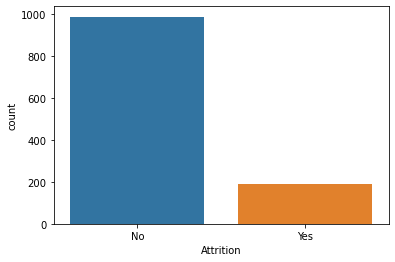

In [12]:
sns.countplot(x=y_train)
print(f'Attrition value counts: \n{y_train.value_counts()}')
print(f'\'Attrition\' == \'No\' for {np.round(987/(987+189),2)}% of the employees.')
plt.show()

As we can see, the classes of the target are not balanced. This means that relying on accuracy to evaluate how well we predict 'Attrition' can be misleading. In fact, if we predicted 'No' for all employees, we would be right 84% of the time. To fairly evaluate our models we will use the area under the curve (AUC) as our metric. 

Let's move on to boolean variables. 

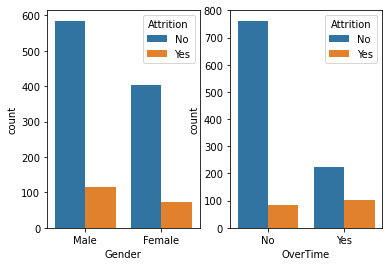

In [13]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=x_train['Gender'], hue=y_train, ax=ax[0])
sns.countplot(x=x_train['OverTime'], hue=y_train, ax=ax[1])
plt.show()

From the above plots we see that 'OverTime' seems to have a strong impact on 'Attrition'. Specifically, employees that work overtime are much more likely to not be at the company in the future. 

Next, let's check the nominal variables. 

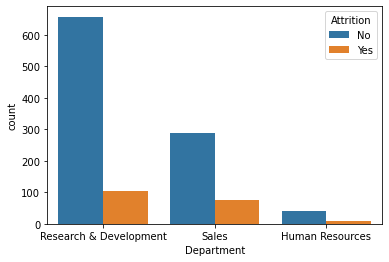

In [14]:
sns.countplot(x=x_train['Department'], hue=y_train)
plt.show()

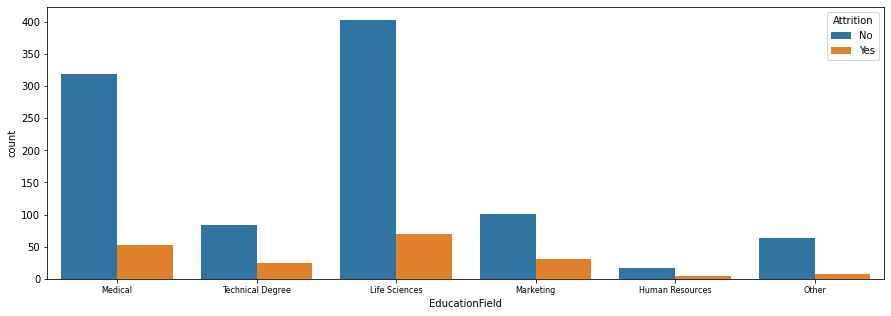

In [15]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
sns.countplot(x=x_train['EducationField'], hue=y_train,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.show()

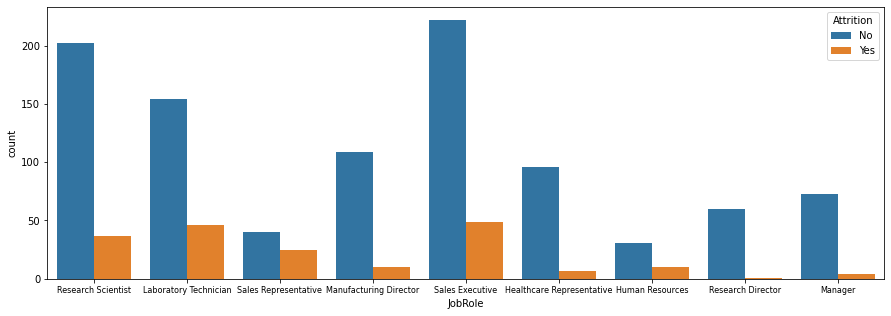

In [16]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
sns.countplot(x=x_train['JobRole'], hue=y_train,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.show()

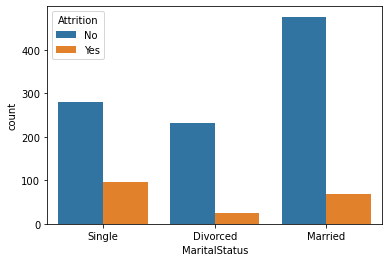

In [17]:
sns.countplot(x=x_train['MaritalStatus'], hue=y_train)
plt.show()

Many variables have imbalanced classes, and some seem to have a considerable impact on attrition. For example, attrition is much higher for sales representatives than for research scientists, and it is higher for single employees rather than for married employees. We notice that some variables like 'EducationField' and 'JobRole' have several classes. This will considerably increase the dimensions of our data when we will do a hot encoding. 

Next, let's consider ordinal variables.

In [15]:
ordinal_variables

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'BusinessTravel']

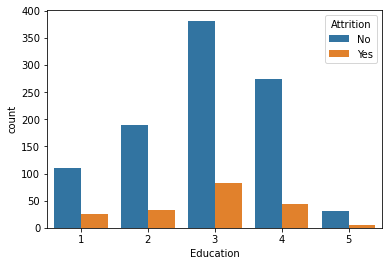

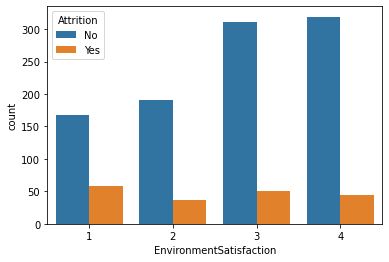

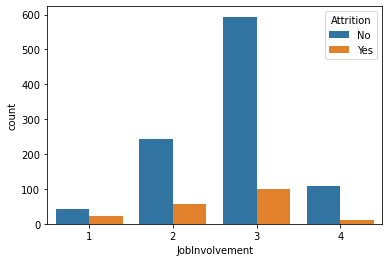

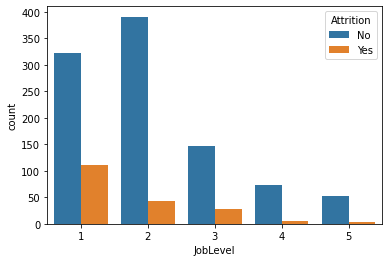

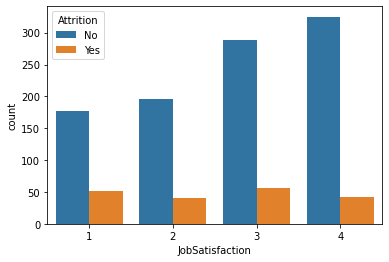

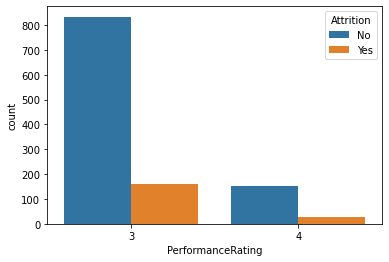

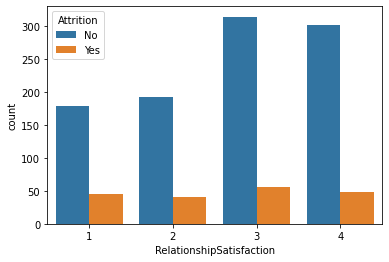

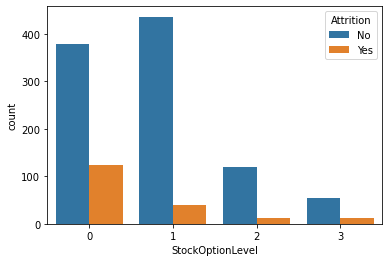

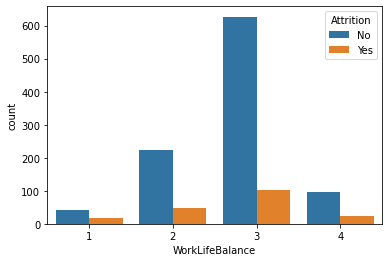

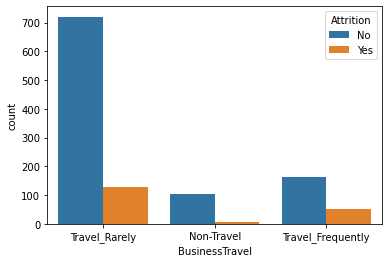

Performance rating unique values in the original dataset: [3 4]


In [19]:
for var in ordinal_variables:
    sns.countplot(x=x_train[var], hue=y_train)
    plt.show()
print('Performance rating unique values in the original dataset:',df_copy['PerformanceRating'].unique())

From the above plots we see that some variables are more skewed (like 'JobLevel'), while some peak around a mean value (like 'Education'). Some of the above plots are not surprising. For example, attrition is more likely to occur for employees that are not satisfied with their job or with the work environment. We also noticed that 'PerformanceRating' only has only two values (3 and 4). We checked whether this is also the case in original dataset and indeed we found the same. This probably indicates that performance was evaluated simply as positive or negative, and so this variable is technically boolean. Since we ultimately want scikit-learn to work with numerical values rather than categories, this will not matter. 

Finally, let's take a look at the continuous variables. 

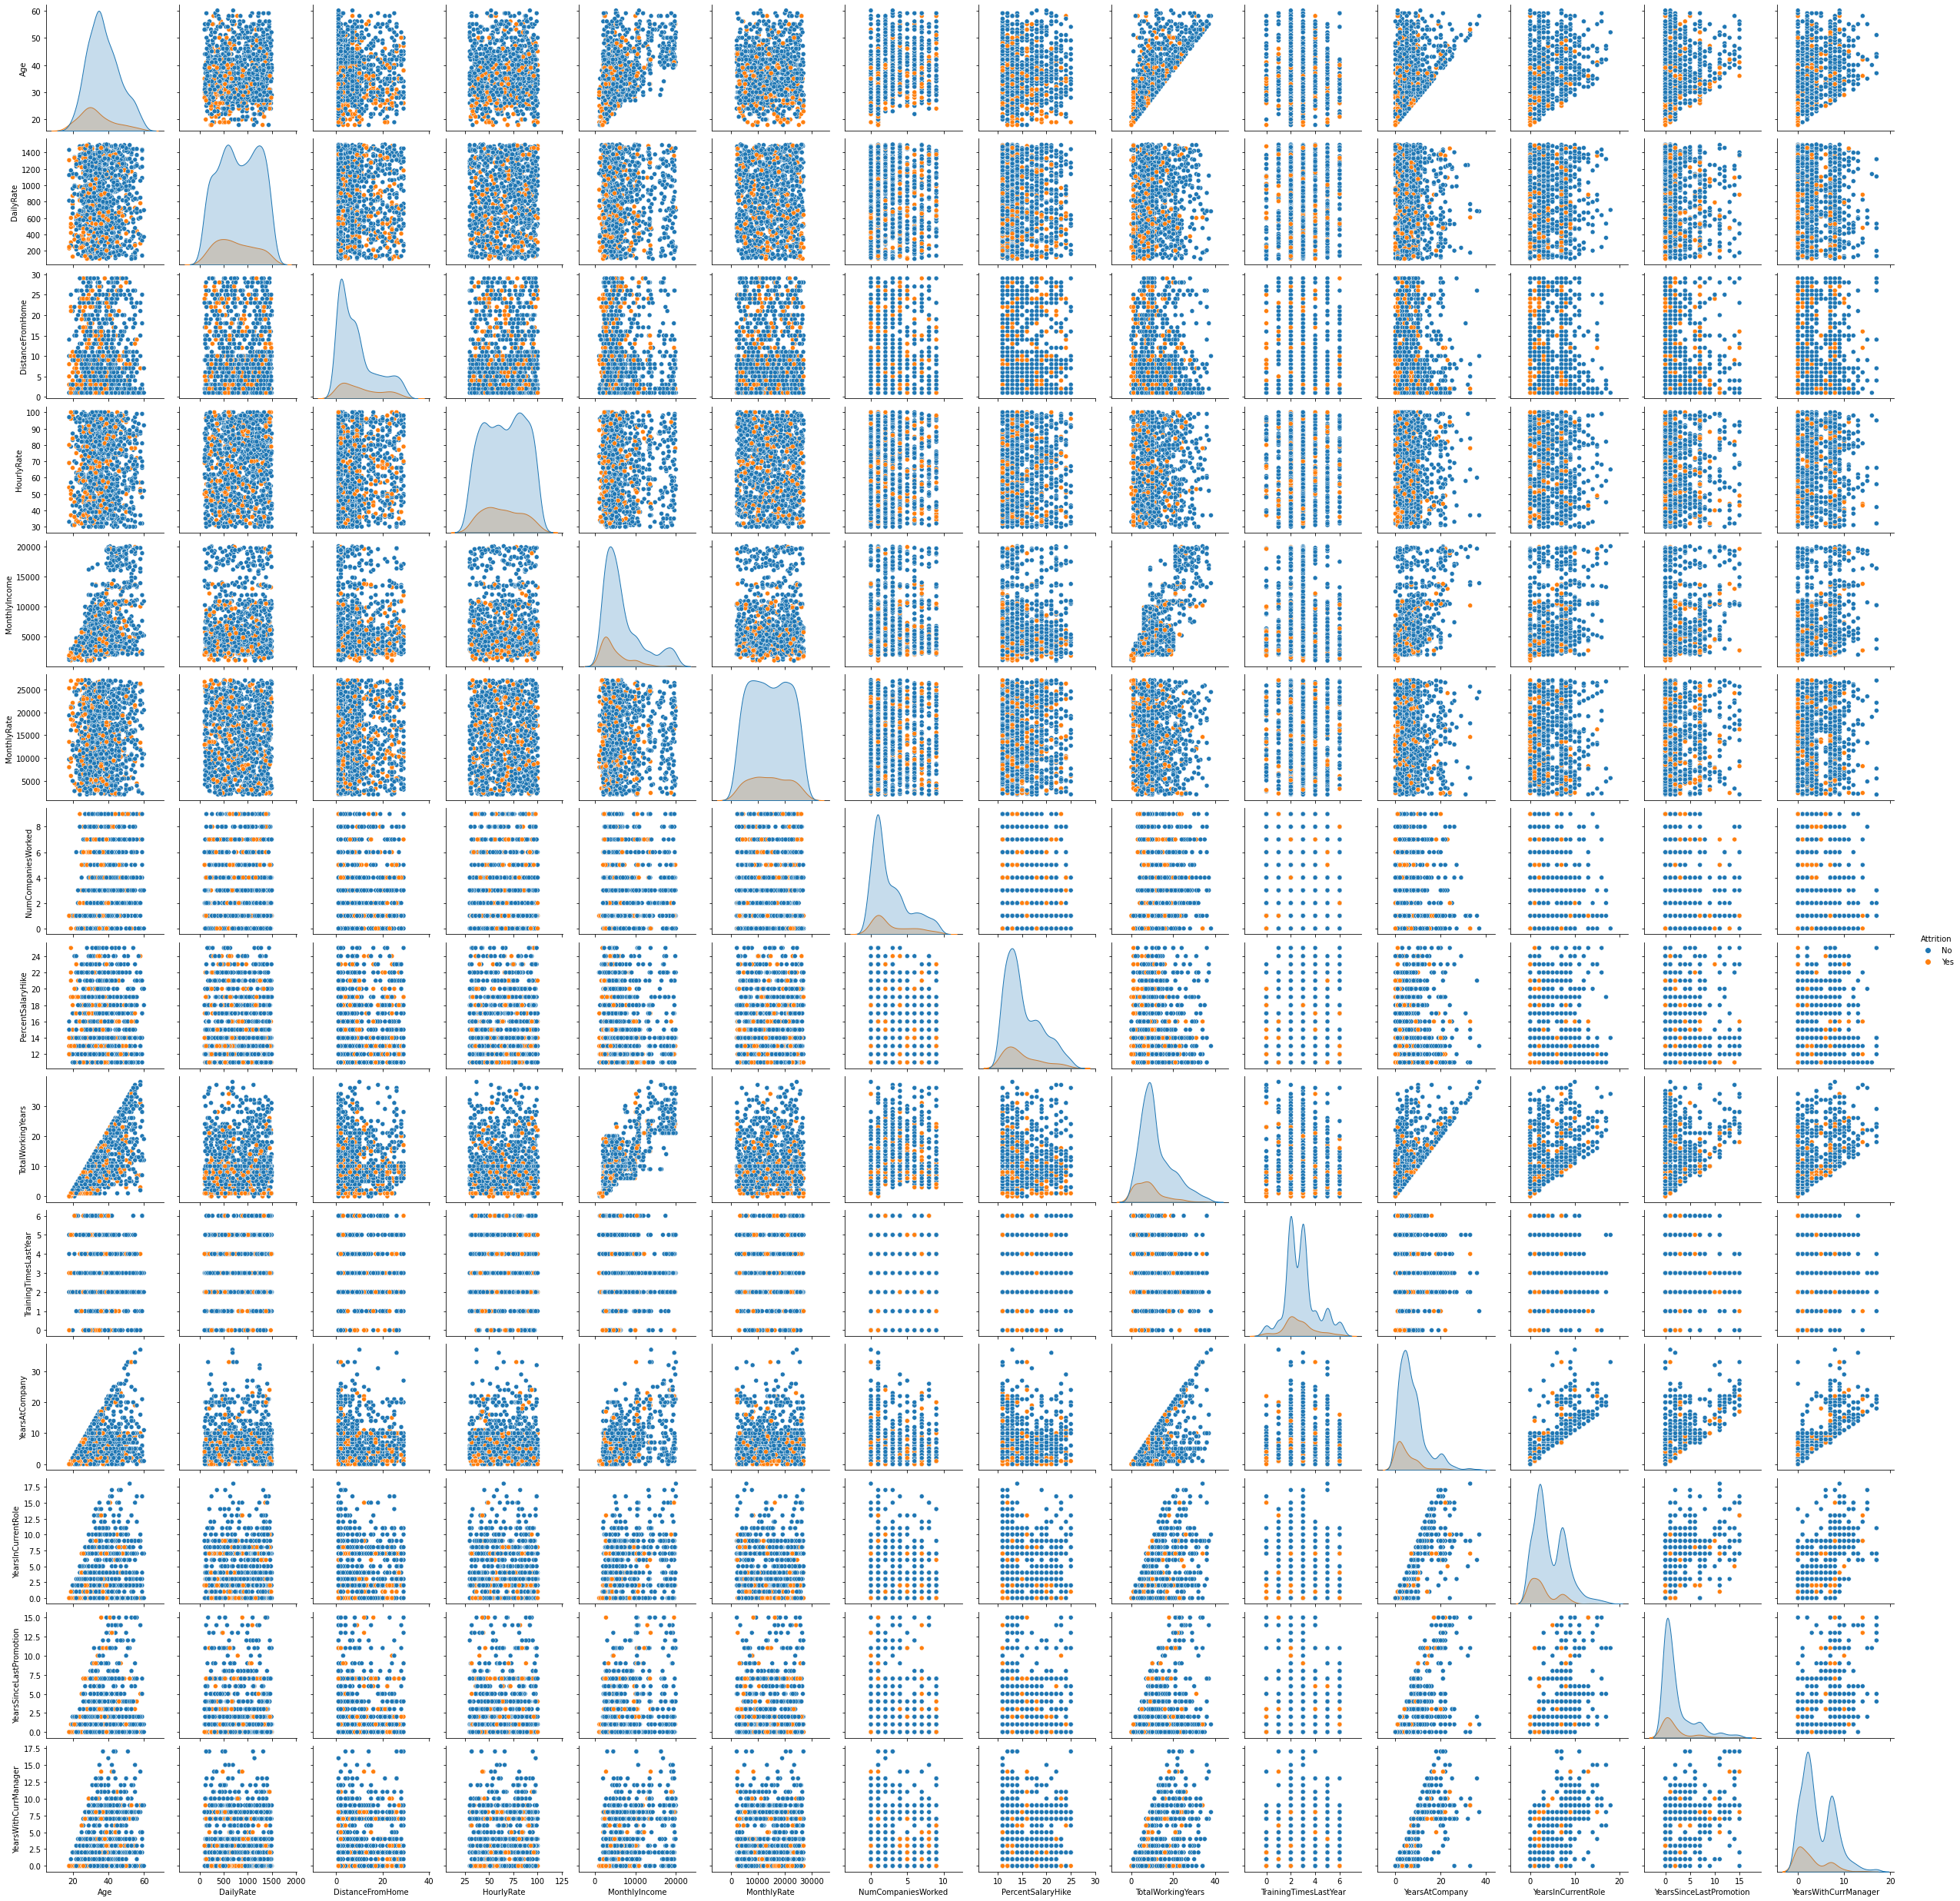

In [20]:
continuous_and_attrition = pd.concat([x_train[continuous_variables],y_train],axis=1)
sns.pairplot(continuous_and_attrition,hue='Attrition')
plt.show()

Since we're working with a fairly large number of variables, we have many scatter plots. Some of these show us that some variables seem to be correlated (for example, 'MonthlyIncome' seems to be correlated with 'TotalWorkingYears', as one would expect). The plots on the diagonal allow us to observe how the variables are distributed. For example, 'Age' for the people that still work at the company seems to peak at a higher value than the one of the employees for which attrition occurred. This indicates that a higher age makes attrition less likely. Not surprisingly, the same seems to be true for 'MonthlyIncome'. 

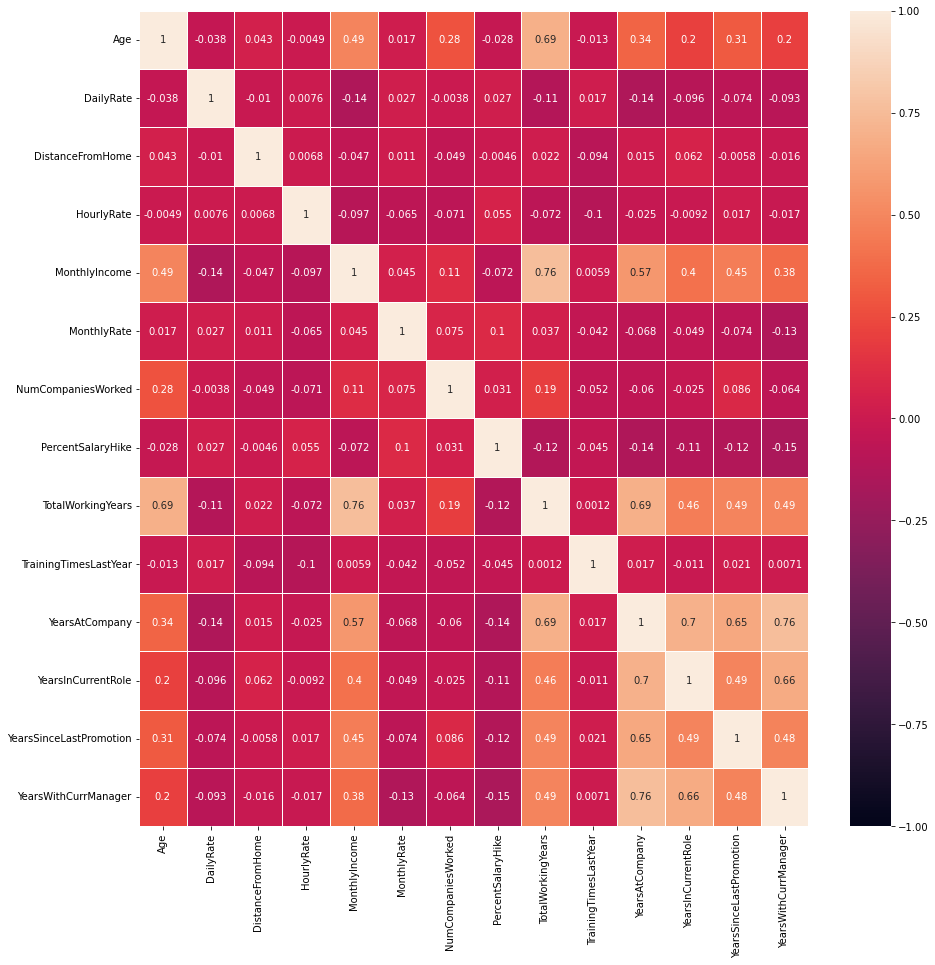

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(x_test[continuous_variables].corr(),vmin=-1,vmax=1,annot=True,linewidths=1)
plt.show()

The above correlation matrix confirms that indeed 'MonthlyIncome' is correlated with 'TotalWorkingYears'. Also, other highly correlated variables are 'YearsAtCompany' and 'YearsWithCurrManager', 'YearsAtCompany' and 'YearsInCurrentRole', 'YearsAtCompany' and 'TotalWorkingYears'. While the high correlation between these variables is not necessarily surprising, these variables might lead to a multicollinearity problem. To solve this issue, we might select only the variables that have a larger impact on 'Attrition', or we could use them to create new variables not highly correlated to each other. For the moment, we will not address this issue and we will leave it for future analysis. 

Oddly,'HourlyRate', 'DailyRate', and 'MonthlyRate' seem to be all uncorrelated. Furthermore, they also seem to not be correlated to 'MonthlyIncome'. Because of this, and because we couldn't find much information about these variables, we will drop them.  

## 2. Data Preparation

We will now prepare the data for analysis. We will start by encoding all categorical variables that don't have a numerical value and we will later standardize the continuous variables. 

### 2.1 Categorical Variables Encoding 

To encode the boolean and ordinal variables, we must assign numerical values to their categories. 

In [16]:
pd.set_option('mode.chained_assignment', None)

y_train[y_train == 'Yes']=1
y_train[y_train == 'No']=0
y_test[y_test == 'No']=0
y_test[y_test == 'Yes']=1

x_train.Gender[x_train['Gender']=='Male']=0
x_train.Gender[x_train['Gender']=='Female']=1
x_test.Gender[x_test['Gender']=='Male']=0
x_test.Gender[x_test['Gender']=='Female']=1

x_train.OverTime[x_train['OverTime']=='Yes']=1
x_train.OverTime[x_train['OverTime']=='No']=0
x_test.OverTime[x_test['OverTime']=='Yes']=1
x_test.OverTime[x_test['OverTime']=='No']=0

x_train.BusinessTravel[x_train['BusinessTravel']=='Non-Travel']=1
x_train.BusinessTravel[x_train['BusinessTravel']=='Travel_Rarely']=2
x_train.BusinessTravel[x_train['BusinessTravel']=='Travel_Frequently']=3
x_test.BusinessTravel[x_test['BusinessTravel']=='Non-Travel']=1
x_test.BusinessTravel[x_test['BusinessTravel']=='Travel_Rarely']=2
x_test.BusinessTravel[x_test['BusinessTravel']=='Travel_Frequently']=3

This is certainly not the best way of encoding variables. We should redo this process using scikit-learn's OrdinalEncoder in the future. 

Let's now encode the nominal variables.

In [17]:
from sklearn.preprocessing import OneHotEncoder
hotEncoder = OneHotEncoder(sparse=False)
hotEncoder.fit(x_train[nominal_variables])
encodedValuesTrain=hotEncoder.transform(x_train[nominal_variables])
encodedDFTrain=pd.DataFrame(encodedValuesTrain,columns=hotEncoder.get_feature_names())
x_train=pd.concat([x_train.reset_index(),encodedDFTrain],axis=1)
x_train.drop(nominal_variables,axis=1,inplace=True)

In [18]:
encodedValuesTest=hotEncoder.transform(x_test[nominal_variables])
encodedDFTest=pd.DataFrame(encodedValuesTest,columns=hotEncoder.get_feature_names())
x_test=pd.concat([x_test.reset_index(),encodedDFTest],axis=1)
x_test.drop(nominal_variables,axis=1,inplace=True)

In [19]:
x_train.drop('index',axis=1,inplace=True)
x_test.drop('index',axis=1,inplace=True)
print('x_train shape =', x_train.shape)
print('x_test shape =', x_test.shape)

x_train shape = (1176, 47)
x_test shape = (294, 47)


We now have encoded all variables. Unfortunately, since we had to hot-encode the nominal variables, we now have 47 features.

### 2.2 Standardization

Since we will use machine learning algorithms like k-nearest neighbors, we need to rescale the data. Specifically, we will standardize the data so that all variables will have a mean of zero and a standard deviation of 1. 

In [20]:
x_train.drop(['HourlyRate','MonthlyRate','DailyRate'],axis=1,inplace=True)
x_test.drop(['HourlyRate','MonthlyRate','DailyRate'],axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train.astype('float'))
x_train_scaled = pd.DataFrame(scaler.transform(x_train.astype('float')),columns = x_train.columns)

In [22]:
x_test_scaled = pd.DataFrame(scaler.transform(x_test.astype('float')),columns = x_test.columns)

In [23]:
y_train = y_train.astype('float')
y_test = y_test.astype('float')

## 3. Machine Learning Models

### 3.1 Trying Out Some Basic Models

As previously mentioned, we will use the AUC as the metric to evaluate the quality of the models. 

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
print('Logistic Regression AUC =',roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:,1]))

Logistic Regression AUC = 0.831808943089431


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_features='sqrt',random_state=25)
rf.fit(x_train_scaled,y_train)
print('Random Forest AUC =',roc_auc_score(y_test, rf.predict_proba(x_test_scaled)[:,1]))

Random Forest AUC = 0.8180470867208672


In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_scaled,y_train)
print('Naive Bayes AUC =',roc_auc_score(y_test, nb.predict_proba(x_test_scaled)[:,1]))

Naive Bayes AUC = 0.760670731707317


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train_scaled,y_train)
print('K-nearest neighbors AUC =',roc_auc_score(y_test, knn.predict_proba(x_test_scaled)[:,1]))

K-nearest neighbors AUC = 0.8350694444444444


In [35]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(eta=0.01,max_depth=4,n_estimators=1000)
xgbc.fit(x_train_scaled,y_train)
print('Extreme gradient boosting AUC =',roc_auc_score(y_test, xgbc.predict_proba(x_test_scaled)[:,1]))

Extreme gradient boosting AUC = 0.8136856368563686


In [36]:
from sklearn.svm import SVC
svc = SVC(probability=True, random_state=25)
svc.fit(x_train_scaled,y_train)
print('Support vector AUC =',roc_auc_score(y_test, svc.predict_proba(x_test_scaled)[:,1]))

Support vector AUC = 0.8317665989159891


In [37]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=200,random_state=25,solver='adam')
mlpc.fit(x_train_scaled,y_train)
print('Multi-layer perceptron AUC =',roc_auc_score(y_test, mlpc.predict_proba(x_test_scaled)[:,1]))

Multi-layer perceptron AUC = 0.7940379403794037


The above results indicate that all algorithms except naive Bayes perform reasonably well. Extreme gradient boosting and the multi-layer perceptron perform worse than basic logistic regression. This might be due to overfitting or to the relatively small size of our data. The most promising classifiers are logistic regression, k-nearest neighbors, the random forest, and the support vector classifier. The fact that basic logistic regression performs so well is somewhat surprising because we earlier noticed that there might be some multicollinearity issues. 

### 3.2 Model Tuning And Features Selection

Since our models are fairly quick to fit, we will tune them using a grid search. Also, since the target is imbalanced, we will use stratified k-fold cross validation. We will not use the multi-layer perceptron classifier because we need much more data to make good predictions with this model. We will start from the extreme gradient boosting classifier to check whether we can significantly improve its performance. 

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
scv = StratifiedKFold(n_splits=5,shuffle=True,random_state=25)
def grid(model, parameters):
    return GridSearchCV(model, param_grid = parameters, scoring='roc_auc', cv = scv,n_jobs=-1)

In [39]:
xgbc = XGBClassifier()
parameters_grid_xgbc = {'eta':np.arange(0.1,1,0.1),'max_depth':np.arange(2,10,2),'n_estimators':np.arange(100,1000,100)}
xgbc_grid = grid(xgbc, parameters_grid_xgbc).fit(x_train_scaled.astype('float'),y_train)
print('xgbc best score =',xgbc_grid.best_score_)
print('xgbc best parameters =', xgbc_grid.best_params_)

xgbc best score = 0.8232830831949187
xgbc best parameters = {'eta': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [40]:
xgbc_tuned = XGBClassifier(eta=0.1,max_depth=2,n_estimators=100)
xgbc_tuned.fit(x_train_scaled,y_train)
print('Extreme gradient boosting AUC =',roc_auc_score(y_test, xgbc_tuned.predict_proba(x_test_scaled)[:,1]))

Extreme gradient boosting AUC = 0.8080115176151761


The AUC score is essentially the same as before (it is actually slightly worse). Thus, even after tuning xgbc is not as good as logistic regression or the random forest classifier. 

Let's now tune the k-nearest neighbors classifier. 

In [41]:
knn = KNeighborsClassifier()
parameters_grid_knn = {'n_neighbors':np.arange(1,500,1)}
knn_grid = grid(knn, parameters_grid_knn).fit(x_train_scaled.astype('float'),y_train)
print('knn best score =',knn_grid.best_score_)
print('knn best parameters =', knn_grid.best_params_)

knn best score = 0.8045648701673281
knn best parameters = {'n_neighbors': 204}


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_tuned = KNeighborsClassifier(n_neighbors=204)
knn_tuned.fit(x_train_scaled,y_train)
print('K-nearest neighbors AUC =',roc_auc_score(y_test, knn_tuned.predict_proba(x_test_scaled)[:,1]))

K-nearest neighbors AUC = 0.8260501355013551


Let's now tune the support vector classifier. 

In [43]:
svc = SVC(probability=True, random_state=25)
parameters_grid_svc = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':np.arange(0.1,3,0.1),'gamma':[0.1,0.01,0.02,0.03,0.001]}
svc_grid = grid(svc, parameters_grid_svc).fit(x_train_scaled.astype('float'),y_train)
print('svc best score =',svc_grid.best_score_)
print('svc best parameters =', svc_grid.best_params_)

svc best score = 0.8376687388576247
svc best parameters = {'C': 0.2, 'gamma': 0.001, 'kernel': 'rbf'}


In [44]:
svc_tuned = SVC(probability=True, random_state=25,C=0.2,gamma=0.001,kernel='rbf')
svc_tuned.fit(x_train_scaled,y_train)
print('Support vector AUC =',roc_auc_score(y_test, svc_tuned.predict_proba(x_test_scaled)[:,1]))

Support vector AUC = 0.839769647696477


This is a slight improvement from the untuned model and it is our best model so far. However, since we are not using a linear kernel, we cannot interpret this model. 

Next, let's tune the random forest classifier. 

In [45]:
rf = RandomForestClassifier(random_state=25)
parameters_grid_rf = {'n_estimators':np.arange(200,2000,200),'max_features':['sqrt',3,4,5,6,7,8],'criterion':['gini','entropy']}
rf_grid = grid(rf, parameters_grid_rf).fit(x_train_scaled.astype('float'),y_train)
print('rf best score =',rf_grid.best_score_)
print('rf best parameters =', rf_grid.best_params_)

rf best score = 0.8168982902218275
rf best parameters = {'criterion': 'entropy', 'max_features': 4, 'n_estimators': 400}


In [47]:
rf_tuned = RandomForestClassifier(random_state=25,criterion='entropy',max_features = 4, n_estimators = 400)
rf_tuned.fit(x_train_scaled,y_train)
print('Random Forest AUC =',roc_auc_score(y_test, rf_tuned.predict_proba(x_test_scaled)[:,1]))

Random Forest AUC = 0.8264735772357723


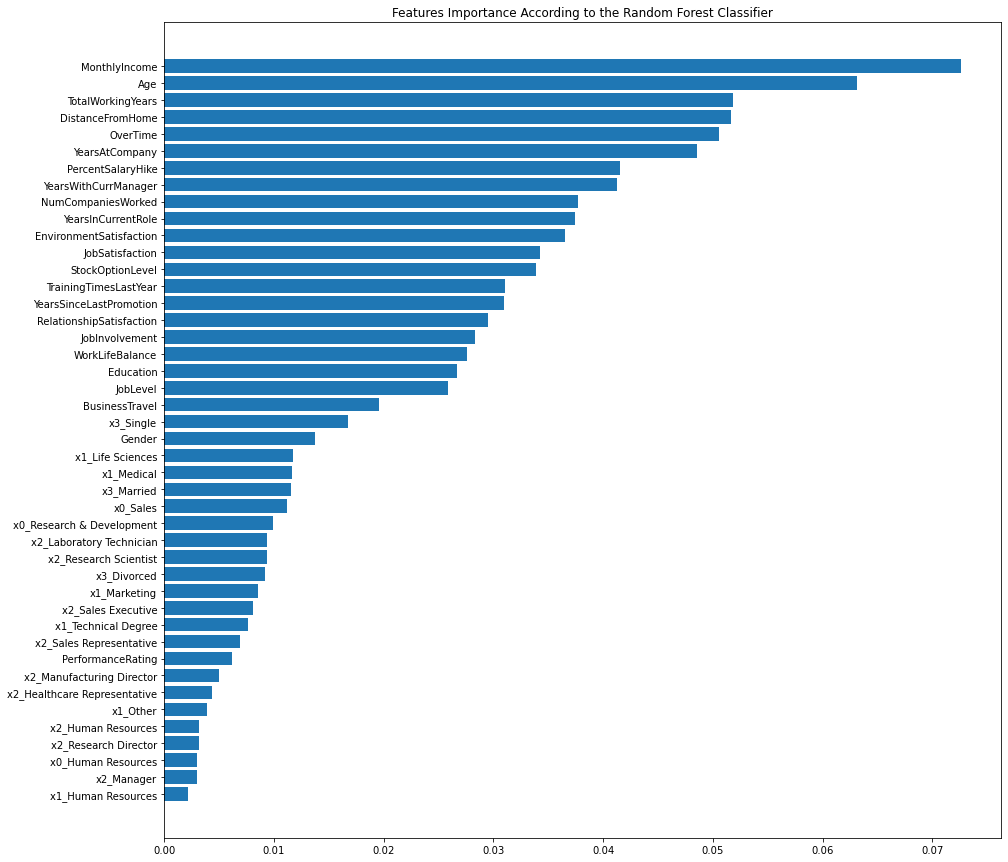

In [48]:
feature_importance=pd.Series(rf_tuned.feature_importances_,index=x_test_scaled.columns)
feature_importance=feature_importance.sort_values(ascending=False)
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(feature_importance.index[:],width=feature_importance.values[:])
ax.invert_yaxis()
ax.set_title('Features Importance According to the Random Forest Classifier')
plt.show()

From the above image, we see that 'MonthlyIncome' is the most important feature, which is not surprising. Instead, it is surprising that 'OverTime' is ranked so high. This is because random forests are biased in considering continuous variables and variables with many categories to be more important. However, 'OverTime' is a boolean variable and so, since it is ranked very high, this seems to indicate that this variable is quite important to accurately predict attrition. We also notice that 'Age' and 'TotalWorkingYears' are ranked quite high. However, these variables are correlated with 'MonthlyIncome' and so we should verify whether these variables are actually predictors of attrition. Finally, we notice that all the dummy variables that we created during the hot-encoding are ranked quite low. This is probably due to the same bias that we mentioned before. 

Let's now focus on the logistic regression classifier. First, let's store the coefficients in a pandas series. We will use the logistic regression coefficients to estimate which variables have a stronger impact on the target. It is important to notice that we can do this only because all variables have been standardized. 

In [49]:
lr_untuned = LogisticRegression()
lr_untuned.fit(x_train_scaled,y_train)
lr_untuned.coef_
lr_coeff = pd.Series(lr_untuned.coef_[0],index=x_train_scaled.columns)
lr_coeff=lr_coeff.sort_values(ascending=False)
#print(lr_coeff)

Next, let's do Ridge and Lasso regressions.

In [50]:
lr = LogisticRegression(penalty='l2')
parameters_grid_lr = {'C': np.arange(0.1, 3, 0.1)}
lr_grid = grid(lr, parameters_grid_lr).fit(x_train_scaled,y_train)
print('lr best score =',lr_grid.best_score_)
print('lr best parameters =', lr_grid.best_params_)

lr best score = 0.8352986399072426
lr best parameters = {'C': 0.1}


In [51]:
lr_ridge = LogisticRegression(C=0.1, penalty='l2')
lr_ridge.fit(x_train_scaled,y_train)
print('Ridge Logistic Regression AUC =',roc_auc_score(y_test, lr_ridge.predict_proba(x_test_scaled)[:,1]))

Ridge Logistic Regression AUC = 0.8310467479674797


In [52]:
lr_ridge.coef_
lr_ridge_coeff = pd.Series(lr_ridge.coef_[0],index=x_train_scaled.columns)
lr_ridge_coeff=lr_ridge_coeff.sort_values(ascending=False)
#print(lr_ridge_coeff)

In [53]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
parameters_grid_lr = {'C': np.arange(0.1, 3, 0.1)}
lr_grid = grid(lr, parameters_grid_lr).fit(x_train_scaled,y_train)
print('lr best score =',lr_grid.best_score_)
print('lr best parameters =', lr_grid.best_params_)

lr best score = 0.8341972956854068
lr best parameters = {'C': 0.7000000000000001}


In [54]:
lr_lasso = LogisticRegression(penalty='l1', solver='liblinear',C=0.7)
lr_lasso.fit(x_train_scaled,y_train)
print('Lasso Logistic Regression AUC =',roc_auc_score(y_test, lr_lasso.predict_proba(x_test_scaled)[:,1]))

Lasso Logistic Regression AUC = 0.8285060975609757


In [55]:
lr_lasso.coef_
lr_lasso_coeff = pd.Series(lr_lasso.coef_[0],index=x_train_scaled.columns)
lr_lasso_coeff=lr_lasso_coeff.sort_values(ascending=False)
#print(lr_lasso_coeff)

The above results show that Ridge regression performs slightly better than unregularized logistic regression, while Lasso regression performs worse. 

Finally, let's try forward and backward selection.

In [56]:
from sklearn.feature_selection import SequentialFeatureSelector
lr_forward = LogisticRegression()
sfs_forward = SequentialFeatureSelector(lr_forward, n_features_to_select=None,direction='forward',scoring='roc_auc',cv=scv,n_jobs=-1)
sfs_forward.fit(x_train_scaled,y_train)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=25, shuffle=True),
                          estimator=LogisticRegression(), n_jobs=-1,
                          scoring='roc_auc')

In [57]:
sfs_forward.support_
forward_selected = x_train_scaled.columns[sfs_forward.support_]
lr_forward = LogisticRegression()
lr_forward.fit(x_train_scaled[forward_selected],y_train)
print('Forward Logistic Regression AUC =',roc_auc_score(y_test, lr_forward.predict_proba(x_test_scaled[forward_selected])[:,1]))

Forward Logistic Regression AUC = 0.8100440379403795


In [58]:
lr_forward.coef_
lr_forward_coeff = pd.Series(lr_forward.coef_[0],index=x_train_scaled[forward_selected].columns)
lr_forward_coeff=lr_forward_coeff.sort_values(ascending=False)
print(lr_forward_coeff.shape)
#print(lr_forward_coeff)

(22,)


In [59]:
lr_backward = LogisticRegression()
sfs_backward = SequentialFeatureSelector(lr_backward, n_features_to_select=None,direction='backward',scoring='roc_auc',cv=scv,n_jobs=-1)
sfs_backward.fit(x_train_scaled,y_train)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=25, shuffle=True),
                          direction='backward', estimator=LogisticRegression(),
                          n_jobs=-1, scoring='roc_auc')

In [60]:
sfs_backward.support_
backward_selected = x_train_scaled.columns[sfs_backward.support_]
lr_backward = LogisticRegression()
lr_backward.fit(x_train_scaled[backward_selected],y_train)
print('Backward Logistic Regression AUC =',roc_auc_score(y_test, lr_backward.predict_proba(x_test_scaled[backward_selected])[:,1]))

Backward Logistic Regression AUC = 0.8053861788617885


In [61]:
lr_backward.coef_
lr_backward_coeff = pd.Series(lr_backward.coef_[0],index=x_train_scaled[backward_selected].columns)
lr_backward_coeff=lr_backward_coeff.sort_values(ascending=False)
print(lr_backward_coeff.shape)
#print(lr_backward_coeff)

(22,)


Both of these models perform worse than the original logistic regression but they have significantly less coefficients. 

In [62]:
print('Results after tuning:')
print('Extreme gradient boosting AUC =',roc_auc_score(y_test, xgbc_tuned.predict_proba(x_test_scaled)[:,1]))
print('K-nearest neighbors AUC =',roc_auc_score(y_test, knn_tuned.predict_proba(x_test_scaled)[:,1]))
print('Support vector AUC =',roc_auc_score(y_test, svc_tuned.predict_proba(x_test_scaled)[:,1]))
print('Random Forest AUC =',roc_auc_score(y_test, rf_tuned.predict_proba(x_test_scaled)[:,1]))
print('Untuned Logistic Regression AUC =',roc_auc_score(y_test, lr_untuned.predict_proba(x_test_scaled)[:,1]))
print('Ridge Logistic Regression AUC =',roc_auc_score(y_test, lr_ridge.predict_proba(x_test_scaled)[:,1]))
print('Lasso Logistic Regression AUC =',roc_auc_score(y_test, lr_lasso.predict_proba(x_test_scaled)[:,1]))
print('Forward Logistic Regression AUC =',roc_auc_score(y_test, lr_forward.predict_proba(x_test_scaled[forward_selected])[:,1]))
print('Backward Logistic Regression AUC =',roc_auc_score(y_test, lr_backward.predict_proba(x_test_scaled[backward_selected])[:,1]))

Results after tuning:
Extreme gradient boosting AUC = 0.8080115176151761
K-nearest neighbors AUC = 0.8260501355013551
Support vector AUC = 0.839769647696477
Random Forest AUC = 0.8264735772357723
Untuned Logistic Regression AUC = 0.831808943089431
Ridge Logistic Regression AUC = 0.8310467479674797
Lasso Logistic Regression AUC = 0.8285060975609757
Forward Logistic Regression AUC = 0.8100440379403795
Backward Logistic Regression AUC = 0.8053861788617885


The support vector classifier is the one with the highest AUC, and so this would be the model that we would use to make the best predictions. Let's plot the ROC curve for this classifier. 

In [63]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test,svc_tuned.predict_proba(x_test_scaled)[:,1])
#auc(fpr,tpr)
random_fpr, random_tpr, random_threshold = roc_curve(y_test,np.zeros(y_test.shape[0]))
#auc(random_fpr,random_tpr)

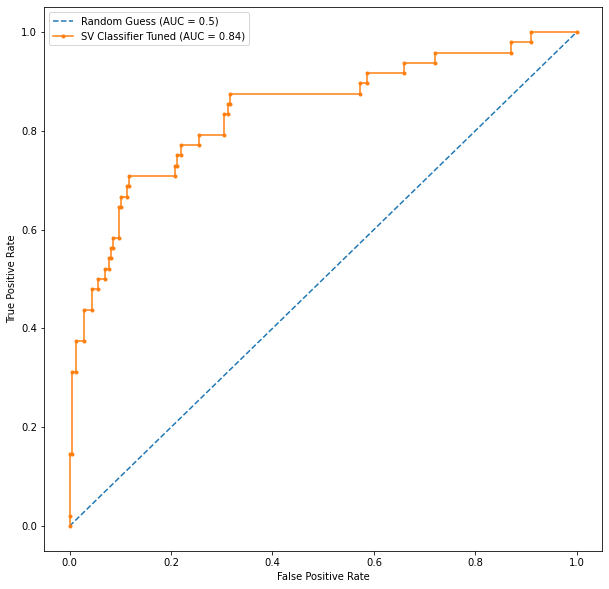

In [64]:
plt.figure(figsize=(10, 10))
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random Guess (AUC = 0.5)')
plt.plot(fpr, tpr, marker='.', label='SV Classifier Tuned (AUC = 0.84)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Using the above ROC curve we can decide what threshold to use in order to obtain better predictions. If we wanted to have the best possible accuracy, we would set a threshold corresponding to the point closest to the top left corner. If we wanted to identify most employees for which attrition occurred (at the cost of misclassifying some), we would set the threshold corresponding to a point closer to the top of the plot. Finally, if we wanted to be confident that our positive predictions for attrition are correct, we would set the threshold corresponding to a point close to the y-axis. Once we have chosen a threshold, we can retrain the model using both x_train and x_test. 

## 4. Model Interpretation 

We now focus on the second goal of this project, which is to identify the causes of attrition. To do this, we will intepret the random forest and the logistic regression classifiers that we have previously obtained. 

### 4.1 Identification of the Most Impactful Variables 

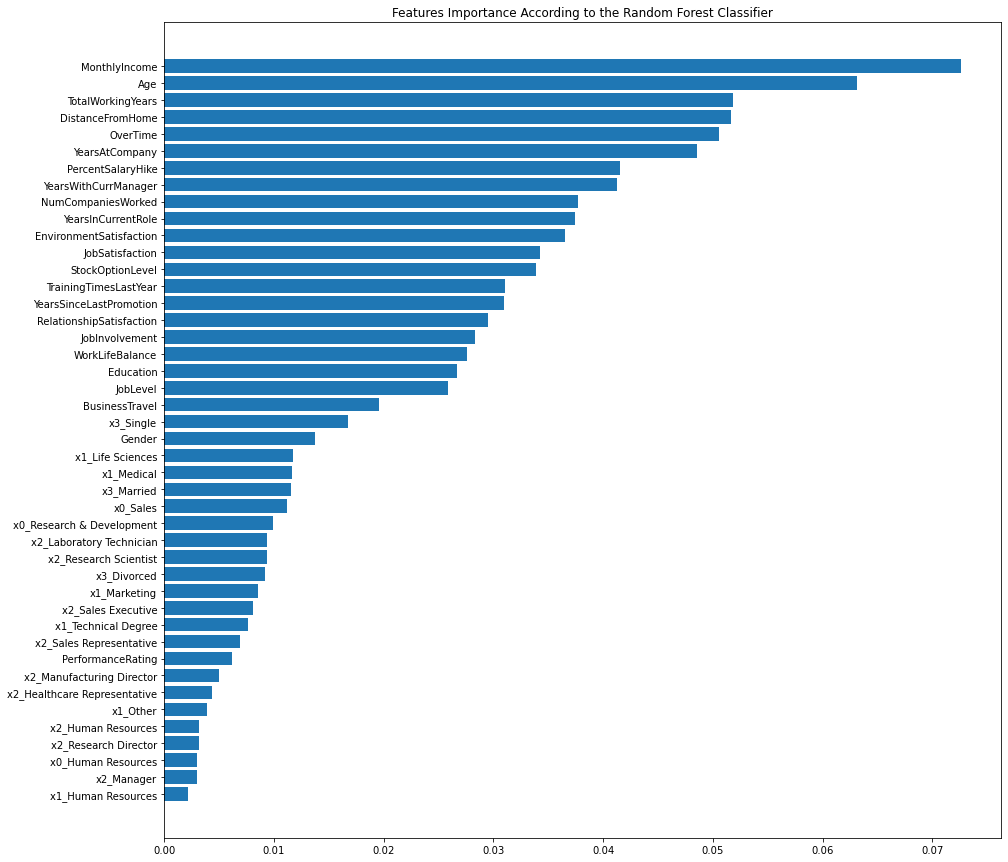

In [65]:
feature_importance=pd.Series(rf_tuned.feature_importances_,index=x_test_scaled.columns)
feature_importance=feature_importance.sort_values(ascending=False)
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(feature_importance.index[:],width=feature_importance.values[:])
ax.invert_yaxis()
ax.set_title('Features Importance According to the Random Forest Classifier')
plt.show()

As previously mentioned, the random forest classifier ranks 'MonthlyIncome' as the most inportant variable. Next, we have 'Age' and 'TotalWorkingYears', which are correlated. So, it seems that attrition is more likely to occur for employees that are not satisfied with their income (which is correlated to their age and total working years).

We notice that all the hot-encoded variables appear to be not important. This is probably due to the bias of random forests against variables that have a low cardinality. Among these variables, 'x3_Single' is ranked higher. This means that attrition is more likely to occur for employees that are neither married nor divorced. 

Also, 'DistanceFromHome' and 'OverTime' are ranked quite high. It is surprising that these are ranked significantly higher than 'JobSatisfaction' and 'WorkLifeBalance'. It might be the case that 'JobSatisfaction' and 'WorkLifeBalance' are being penalized for having a low cardinality. 

Let's now analyze the logistic regression classifiers. To do this, we will make bar charts of the fit parameters. Since all variables are standardized, their value tells us which variables have a larger impact on attrition. Specifically, if the parameter associated to a variable has a high absolute value, we infer that the variable has a high impact on attrition, and vice versa. If the parameter of a variable is exactly zero, then that variable is not in the model. Also, if the parameter associated with a variable is positive, we infer that a higher value of that variable leads to a higher probability of attrition, and vice versa. 

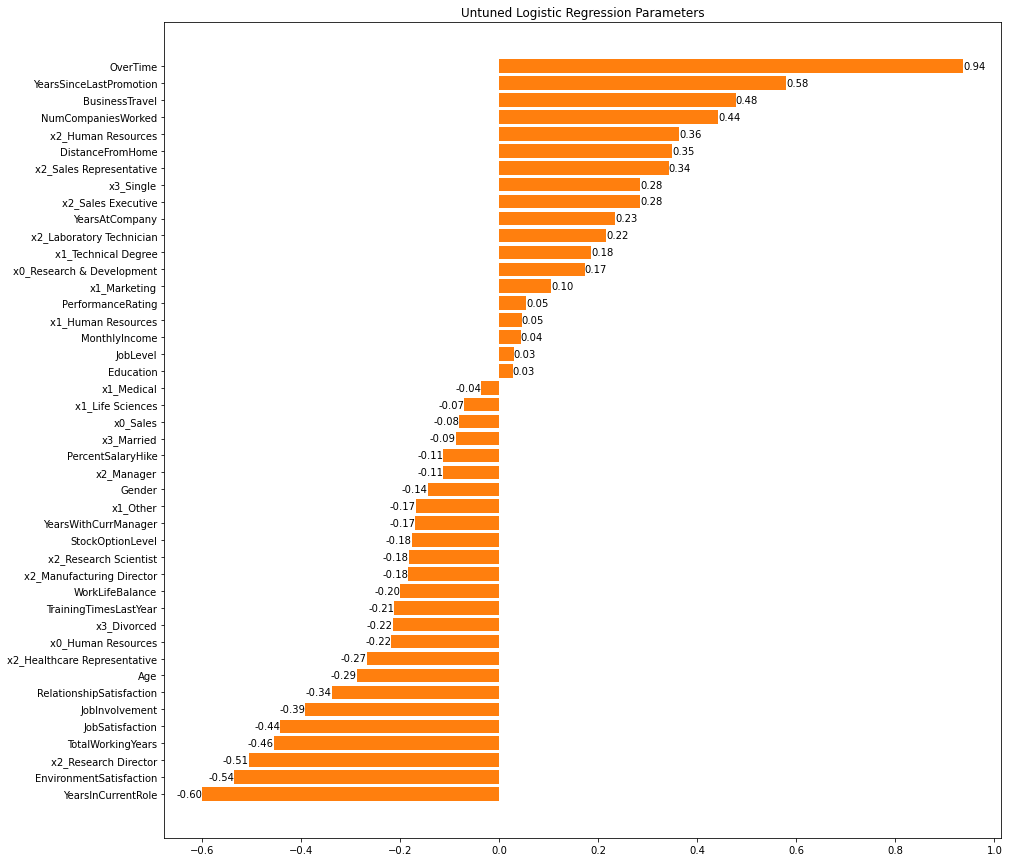

In [66]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(lr_coeff.index,width=lr_coeff.values)
ax.bar_label(plt.barh(lr_coeff.index,width=lr_coeff.values),fmt='%.2f')
ax.invert_yaxis()
ax.set_title('Untuned Logistic Regression Parameters')
plt.show()

The above plot confirms that attrition is more likely for employees that work overtime. Other variables that have a large positive parameter are 'YearsSinceLastPromotion', 'BusinessTravel', and 'NumCompaniesWorked'. 

The variables that have the higher negative parameter values are 'YearsInCurrentRole', 'EnvironmentSatisfaction', and 'x2_ResearchDirector'. 

We notice that both 'MonthlyIncome' and 'Age' seem not to have a large impact on attrition. The reason for this is probably that they are both correlated with 'TotalWorkingYears', which has a fairly large impact on attrition. 

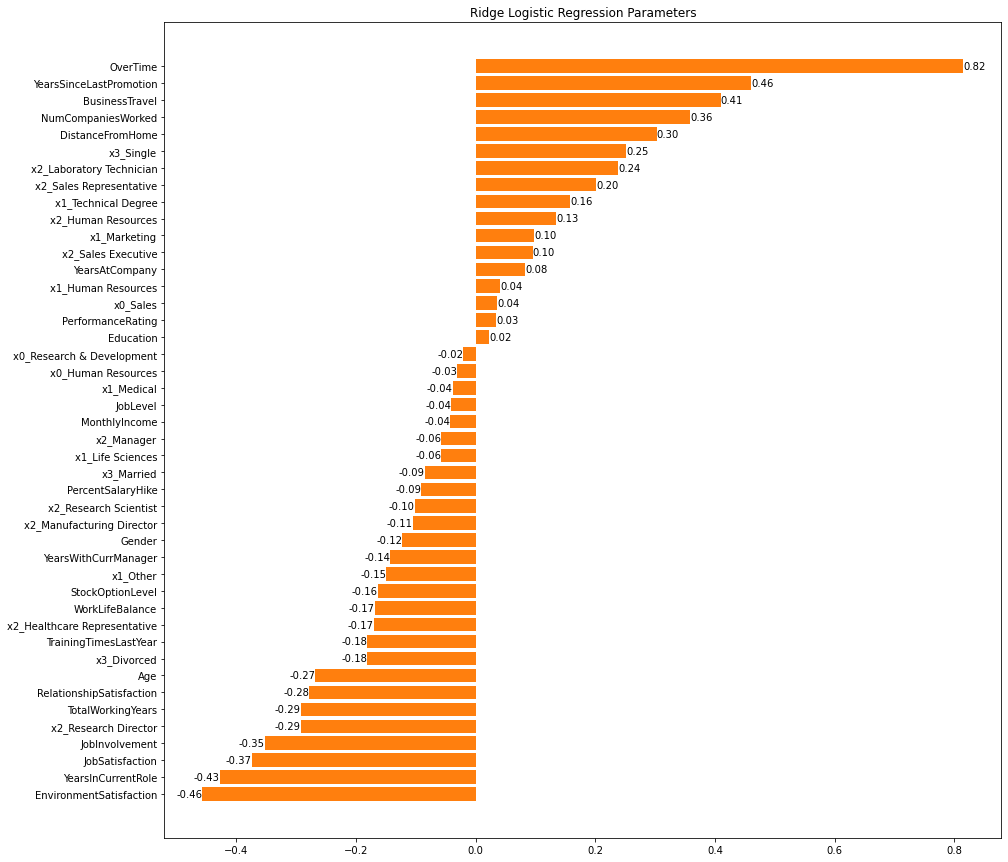

In [67]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(lr_ridge_coeff.index,width=lr_ridge_coeff.values)
ax.bar_label(plt.barh(lr_ridge_coeff.index,width=lr_ridge_coeff.values),fmt='%.2f')
ax.invert_yaxis()
ax.set_title('Ridge Logistic Regression Parameters')
plt.show()

The parameters of the Ridge regression are similar to the ones of the untuned model. One of the main differences is that 'x2_ResearchDirector' doesn't seem as impactful. 

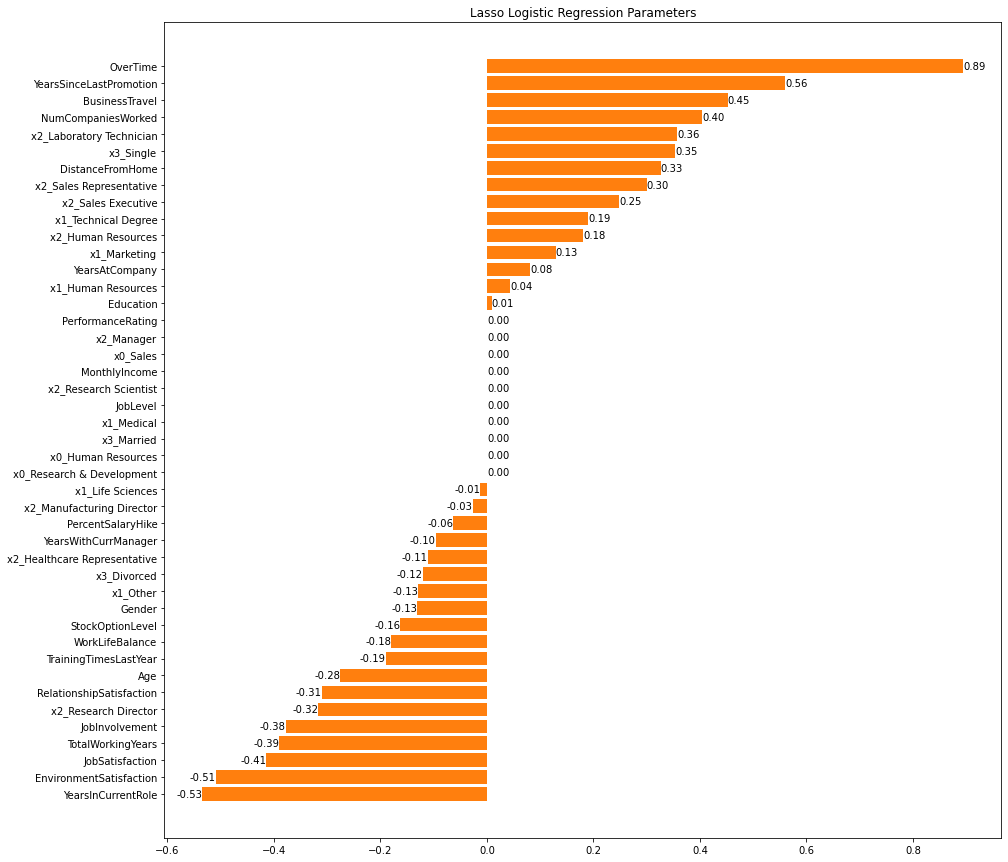

In [68]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(lr_lasso_coeff.index,width=lr_lasso_coeff.values)
ax.bar_label(plt.barh(lr_lasso_coeff.index,width=lr_lasso_coeff.values),fmt='%.2f')
ax.invert_yaxis()
ax.set_title('Lasso Logistic Regression Parameters')
plt.show()

Lasso regression produced similar results to Ridge regression, except that some coefficients are now zero. 

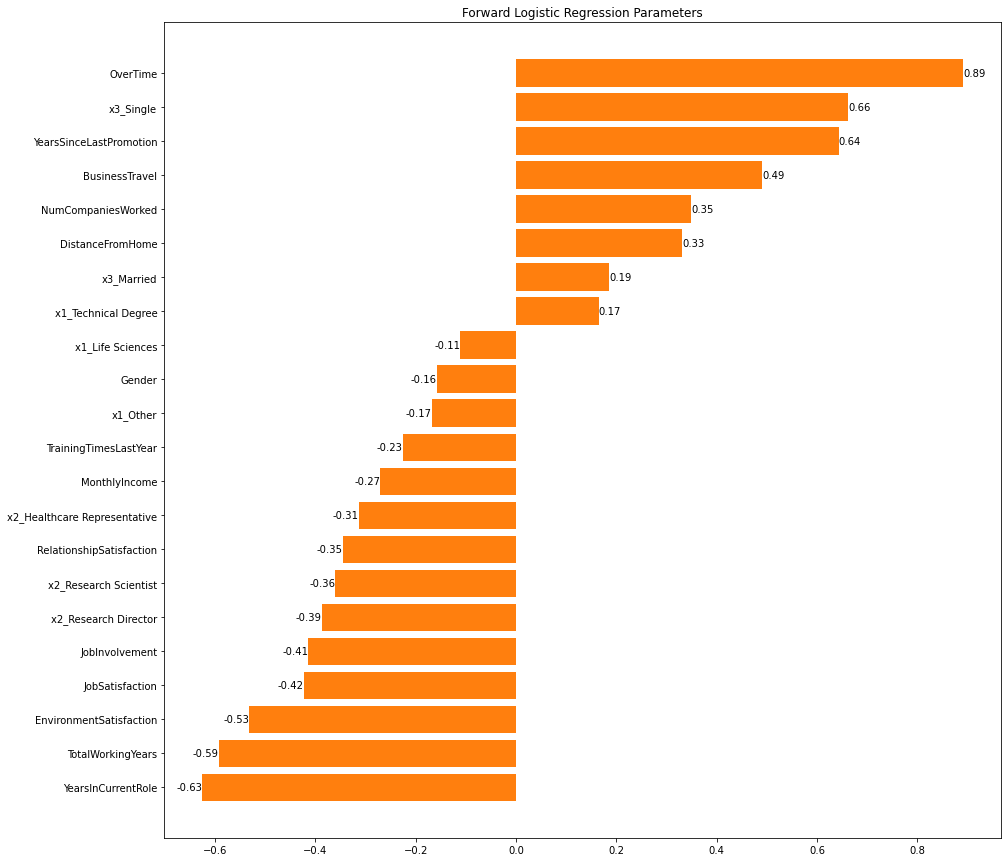

In [70]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(lr_forward_coeff.index,width=lr_forward_coeff.values)
ax.bar_label(plt.barh(lr_forward_coeff.index,width=lr_forward_coeff.values),fmt='%.2f')
ax.invert_yaxis()
ax.set_title('Forward Logistic Regression Parameters')
plt.show()

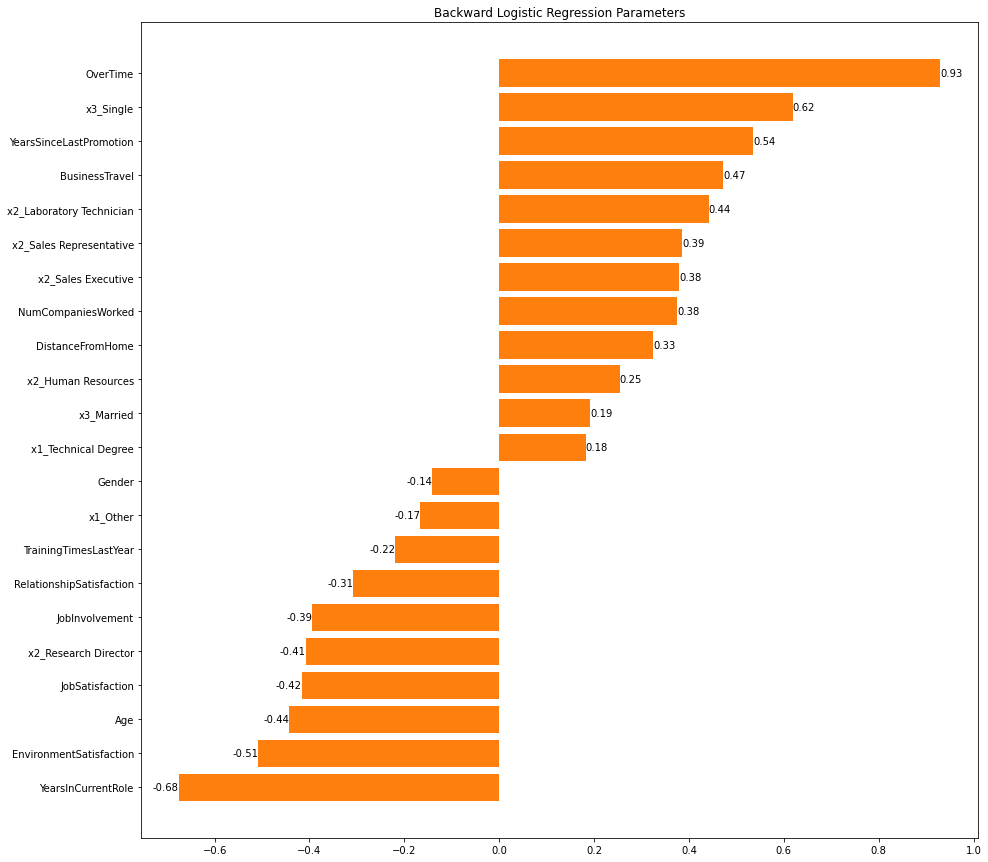

In [69]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.barh(lr_backward_coeff.index,width=lr_backward_coeff.values)
ax.bar_label(plt.barh(lr_backward_coeff.index,width=lr_backward_coeff.values),fmt='%.2f')
ax.invert_yaxis()
ax.set_title('Backward Logistic Regression Parameters')
plt.show()

Both forward and backward selected models agree that 'OverTime', 'YearsSinceLastPromotion', 'BusinessTravel', 'YearsInCurrentRole', and 'EnvironmentSatisfaction' are very impactful on attrition. However, they also seem to consider 'x3_Single' to be very impactful. This doesn't agree with the models containing more variables. A possible explanation is that the simpler models dropped some variables that are related to 'x3_Single', and so the impact of 'x3_Single' appears to be much higher. 

In the previous section we concluded that the most impactful variables are 'OverTime', 'YearsSinceLastPromotion', 'BusinessTravel', 'YearsInCurrentRole', 'EnvironmentalSatisfaction', and potentially 'MonthlyIncome', 'Age', 'DitanceFromHome', and 'x3_Single'. 

Let's start by assessing what impact 'x3_Single' has on attrition. 

In [24]:
train = pd.concat([x_train.reset_index(),y_train.reset_index()],axis=1)

In [25]:
pd.pivot_table(train,index='Attrition',columns='x3_Single',values='Age',aggfunc='count')

x3_Single  0.0  1.0
Attrition          
0.0        707  280
1.0         94   95

We see that attrition occurred for 11.7% of divorced and married employees, and for 25.3% of the employees that are single. So, this variable is impactful.

The next question then is whether 'x3_Single' is related to 'Age' and 'MonthlyIncome'.

In [26]:
pd.pivot_table(train,columns='x3_Single',values='Age',aggfunc='mean')

x3_Single        0.0        1.0
Age        37.600499  34.906667

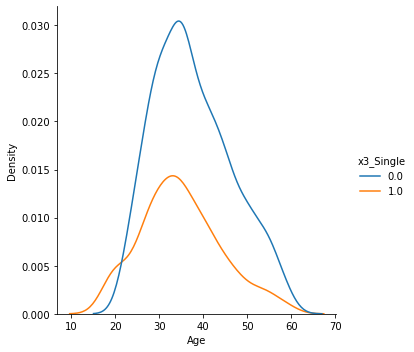

In [27]:
sns.displot(train, x="Age", hue="x3_Single", kind="kde")
plt.show()

In [28]:
pd.pivot_table(train,columns='x3_Single',values='MonthlyIncome',aggfunc='mean')

x3_Single              0.0       1.0
MonthlyIncome  6796.630462  5778.936

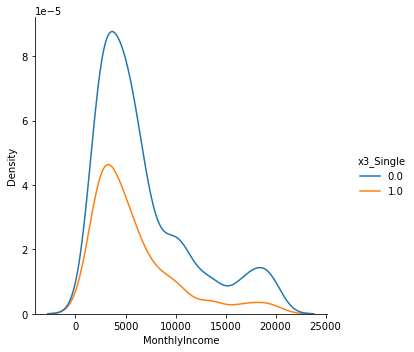

In [29]:
sns.displot(train, x="MonthlyIncome", hue="x3_Single", kind="kde")
plt.show()

So, it seems that singles are a bit younger and make a bit less on average. This might explain why attrition is more likely to occur for singles but further analysis is needed to conclude this. 

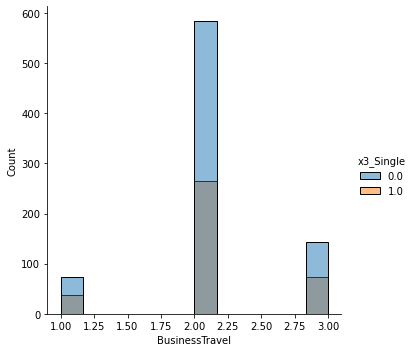

In [30]:
sns.displot(train, x="BusinessTravel", hue="x3_Single")
plt.show()

In [31]:
pd.pivot_table(train,columns='x3_Single',values='BusinessTravel',aggfunc='mean')

x3_Single            0.0       1.0
BusinessTravel  2.086142  2.098667

Another idea that we considered is whether singles had more business trips (which seems to have an impact on attrition) but this doesn't seem to be the case. 

Next, let's consider 'OverTime'.

In [32]:
pd.pivot_table(train,index='Attrition',columns='OverTime',values='Age',aggfunc='count')

OverTime     0    1
Attrition          
0.0        762  225
1.0         85  104

Attrition occurred for 10.0% of the employees that don't work overtime, and for 31.6% of the employees that work overtime. This means that 'Overtime' has a large impact on attrition, as indicated by all models. 

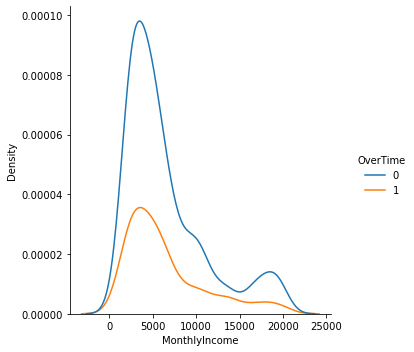

In [33]:
sns.displot(train, x="MonthlyIncome", hue="OverTime", kind="kde")
plt.show()

In [34]:
pd.pivot_table(train,columns='OverTime',values='MonthlyIncome',aggfunc='mean')

OverTime                 0            1
MonthlyIncome  6491.075561  6423.285714

'MonthlyIncome' seems to not be affected by 'OverTime'. This might actually mean that 'MonthlyIncome' only refers to the base salary. Unfortunately, this information wasn't given by the dataset provider.  

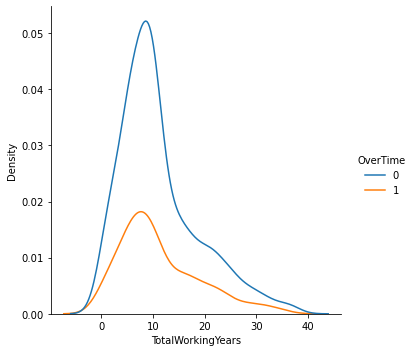

In [35]:
sns.displot(train, x="TotalWorkingYears", hue="OverTime", kind="kde")
plt.show()

In [36]:
pd.pivot_table(train,columns='OverTime',values='TotalWorkingYears',aggfunc='mean')

OverTime                   0          1
TotalWorkingYears  11.132231  11.203647

'Age' also seems not to be related to 'OverTime'. 

In [37]:
pd.pivot_table(train,index='x3_Single',columns='OverTime',values='Age',aggfunc='count')

OverTime     0    1
x3_Single          
0.0        574  227
1.0        273  102

In [38]:
pd.pivot_table(train,columns='OverTime',values='EnvironmentSatisfaction',aggfunc='mean')

OverTime                        0         1
EnvironmentSatisfaction  2.693034  2.838906

In [39]:
pd.pivot_table(train,columns='OverTime',values='WorkLifeBalance',aggfunc='mean')

OverTime                0         1
WorkLifeBalance  2.783943  2.738602

In [40]:
pd.pivot_table(train,columns='OverTime',values='YearsInCurrentRole',aggfunc='mean')

OverTime                   0         1
YearsInCurrentRole  4.291617  3.851064

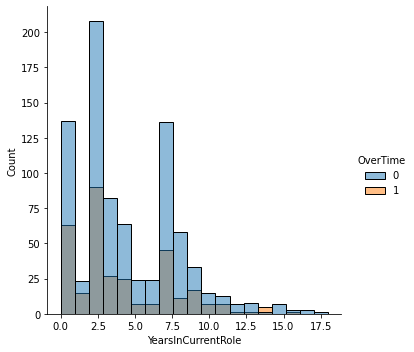

In [41]:
sns.displot(train, x="YearsInCurrentRole", hue="OverTime")
plt.show()

In [42]:
pd.pivot_table(train,columns='OverTime',values='JobSatisfaction',aggfunc='mean')

OverTime                0         1
JobSatisfaction  2.695396  2.796353

The above tables and plots indicate that employees that work overtime are not particularly unsatisfied with the job or the work environmet, they don't have a wrose work-life balance, they don't have a lower income, and they are not younger than other employees. So, it seems that working overtime itself is a cause of attrition, which seems a bit odd. 

Finally, let's assess whether 'MonthlyIncome' is really as important as indecated by the random forest classifier. 

In [43]:
pd.pivot_table(train,columns='Attrition',values='MonthlyIncome',aggfunc='mean')

Attrition              0.0          1.0
MonthlyIncome  6782.400203  4851.708995

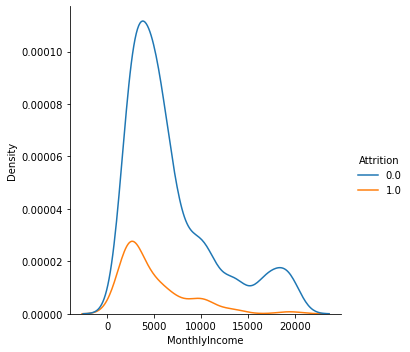

In [44]:
sns.displot(train, x="MonthlyIncome", hue="Attrition", kind="kde")
plt.show()

Clearly, attrition is more likely to occur for employees that have a lower income. However, 'MonthlyIncome' is correlated with 'Age', 'TotalWorkingYears', and 'YearsAtCompany'. 

Attrition        0.0        1.0
Age        37.402229  33.291005


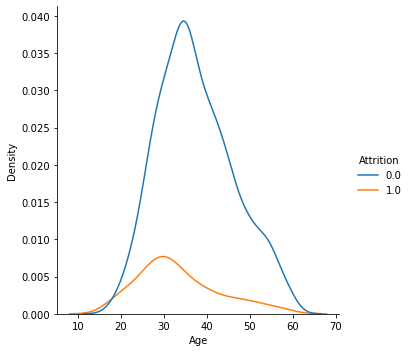

In [45]:
print(pd.pivot_table(train,columns='Attrition',values='Age',aggfunc='mean'))
sns.displot(train, x="Age", hue="Attrition", kind="kde")
plt.show()

Attrition                0.0       1.0
TotalWorkingYears  11.730496  8.132275


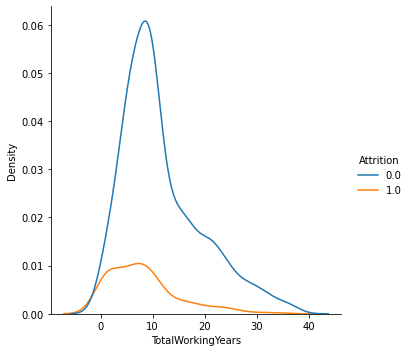

In [46]:
print(pd.pivot_table(train,columns='Attrition',values='TotalWorkingYears',aggfunc='mean'))
sns.displot(train, x="TotalWorkingYears", hue="Attrition", kind="kde")
plt.show()

Attrition            0.0       1.0
YearsAtCompany  7.222898  4.835979


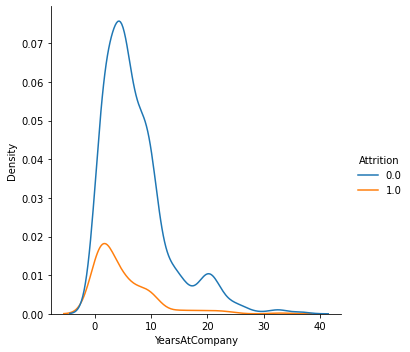

In [47]:
print(pd.pivot_table(train,columns='Attrition',values='YearsAtCompany',aggfunc='mean'))
sns.displot(train, x="YearsAtCompany", hue="Attrition", kind="kde")
plt.show()

These other variables also appear to have an impact on attrition.

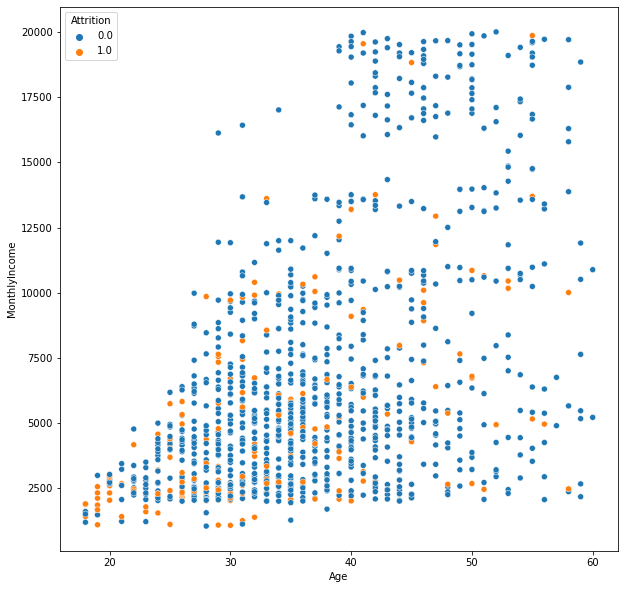

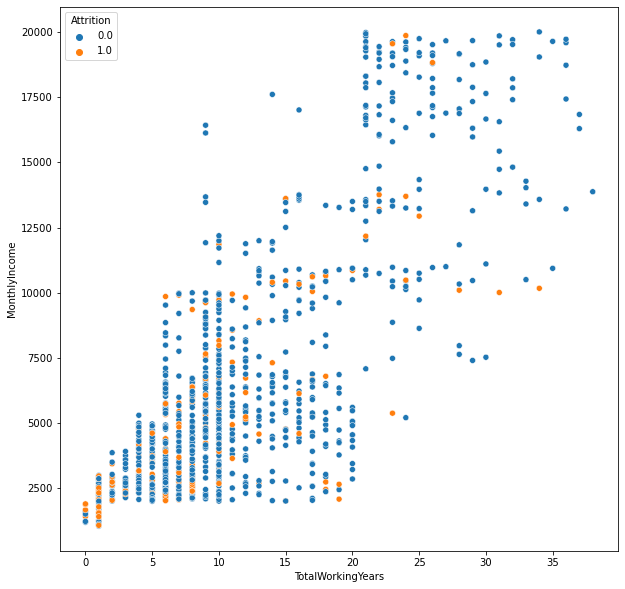

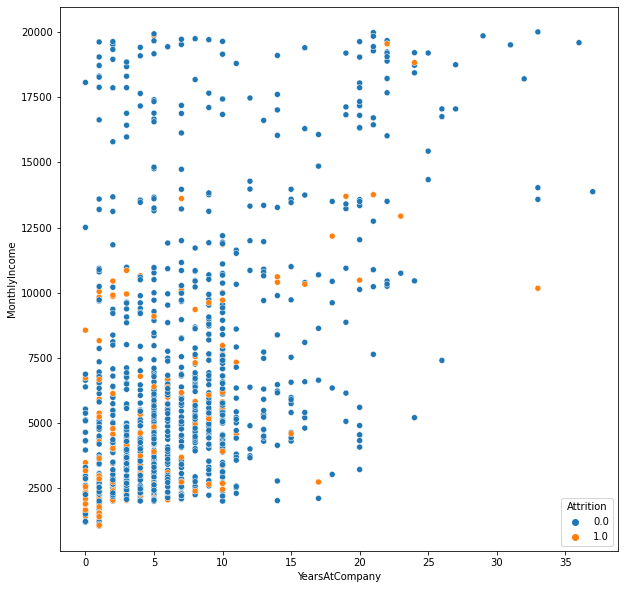

In [48]:
for var in ['Age', 'TotalWorkingYears','YearsAtCompany']:
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    sns.scatterplot(data=train,x=var,y='MonthlyIncome',hue='Attrition')
    plt.show()

In [49]:
for var in ['Age', 'TotalWorkingYears','YearsAtCompany','MonthlyIncome','YearsSinceLastPromotion','OverTime','EnvironmentSatisfaction','BusinessTravel']:
    lr_trial = LogisticRegression()
    lr_trial.fit(x_train_scaled[[var]],y_train)
    print(f'{var} Logistic Regression AUC =',roc_auc_score(y_test, lr_trial.predict_proba(x_test_scaled[[var]])[:,1]))
    
lr_trial = LogisticRegression()
lr_trial.fit(x_train_scaled[['MonthlyIncome','OverTime']],y_train)
print(' Logistic Regression AUC =',roc_auc_score(y_test, lr_trial.predict_proba(x_test_scaled[['MonthlyIncome','OverTime']])[:,1]))
    

NameError: name 'LogisticRegression' is not defined

Both the logistic regression classifiers and the random forest classifier indicate that 'OverTime' is one of the most impactful variables on 'Attrition'. Specifically, attrition is much more likely to occur for employees that work overtime. 

Another very impactful variable is 'MonthlyIncome'. The random forest classifier correctly ranked this feature very high, while the logistic regression models considered the impact of this variable very low. This is due to a multicollinearity issue. We also noticed that 'MonthlyIncome' is highly correlated with 'TotalWorkingYears', which also seems to be quite important. In the future, we should futher analyze the relationship between these two variables. 

Interestingly, 'YearsSinceLastPromotion' and 'EnvironmentSatisfaction' don't seem to be very predictive on their own. However, they are considered quite impactful by all logistic regression classifiers. This might still be a multicollinearity issue, but maybe there might be some interaction between these variables and other variables. 

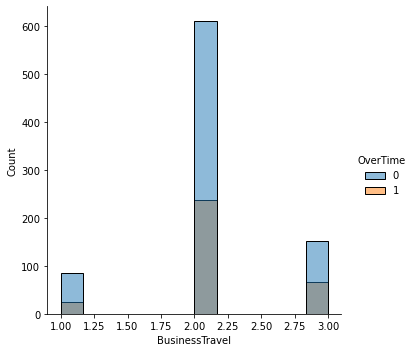

In [50]:
sns.displot(train, x="BusinessTravel", hue="OverTime")
plt.show()

In [51]:
pd.pivot_table(train,index='Attrition',columns='BusinessTravel',values='MonthlyIncome',aggfunc='count')

BusinessTravel    1    2    3
Attrition                    
0.0             103  720  164
1.0               8  128   53

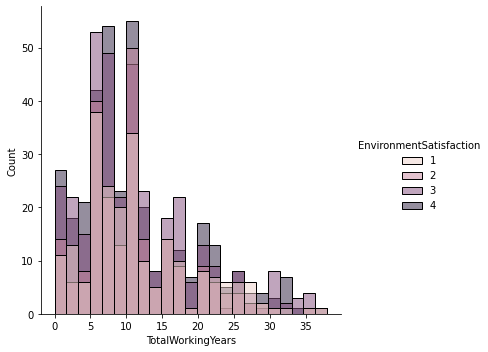

In [52]:
sns.displot(train, x="TotalWorkingYears", hue="EnvironmentSatisfaction")
plt.show()

### 4.2 Final Variable Importance Assessment 

In the previous section we concluded that the most impactful variables are 'OverTime', 'YearsSinceLastPromotion', 'BusinessTravel', 'YearsInCurrentRole', 'EnvironmentSatisfaction', 'TotalWorkingYears', and potentially 'MonthlyIncome', 'Age', 'DistanceFromHome', and 'x3_Single'. Let's assess the predictive power of these variables individually. 

In [71]:
for var in ['OverTime', 'YearsSinceLastPromotion', 'BusinessTravel', 'YearsInCurrentRole', 'EnvironmentSatisfaction', 'TotalWorkingYears','MonthlyIncome', 'Age', 'DistanceFromHome', 'x3_Single']:
    lr_trial = LogisticRegression()
    lr_trial.fit(x_train_scaled[[var]],y_train)
    print(f'{var} Logistic Regression AUC =',roc_auc_score(y_test, lr_trial.predict_proba(x_test_scaled[[var]])[:,1]))
    

OverTime Logistic Regression AUC = 0.6095020325203252
YearsSinceLastPromotion Logistic Regression AUC = 0.5160907859078591
BusinessTravel Logistic Regression AUC = 0.5904471544715447
YearsInCurrentRole Logistic Regression AUC = 0.5880335365853658
EnvironmentSatisfaction Logistic Regression AUC = 0.5132113821138211
TotalWorkingYears Logistic Regression AUC = 0.6848746612466124
MonthlyIncome Logistic Regression AUC = 0.6935975609756098
Age Logistic Regression AUC = 0.6135247289972899
DistanceFromHome Logistic Regression AUC = 0.5530149051490515
x3_Single Logistic Regression AUC = 0.6181402439024392


We see that the most important important variables are 'MonthlyIncome' and 'TotalWorkingYears'. It is reasonable that income has a large impact on attrition, as predicted by the random forest classifier. However, the logistic regression classifiers gave little importance to 'MonthlyIncome' and gave more importance to 'TotalWorkingYears'. Inspecting the correlation matrix that we previously obtained, we see that the correlation between these two variables is 0.76, which is quite high. Thus, the values of the logistic regression parameters for these variables are not reliable since there is a clear multicollinearity issue. Regardless of this, it is evident that these variables have a high impact on attrition. In the future, we should assess weather attrition depends mostly on 'MonthlyIncome', 'TotalWorkingYears', or a combination of the two. This is extremely important because it would be a waste of money for the company to increase the salary of inexperienced employees to prevent attrition if 'MonthlyIncome' is not directly responsible for attrition. 

Next, we see that 'Age' and 'YearsInCurrentRole' seem to be fairly important. This seems to indicate that younger employees with less experience in a role are more likely to leave the company. However, these variables are both somewhat correlated with 'TotalWorkingYears' and 'MonthlyIncome', and so it might actually be the case that younger employees with lower income have a higher probability of leaving the company, regardless of how much experience they have in a certain role. In the future, we should assess whether these features are actually that useful if 'TotalWorkingYears' is already present in the model. 

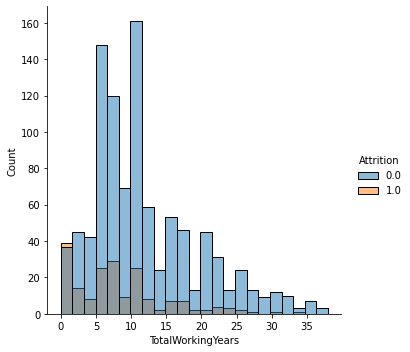

In [72]:
train = pd.concat([x_train.reset_index(),y_train.reset_index()],axis=1)
sns.displot(train, x="TotalWorkingYears", hue="Attrition")
plt.show()

In addition, the above distribution seems to that indicate attrition is indeed mostly due to less experienced employees leaving the company rather than to more experienced employees retiring.

In [73]:
print(pd.pivot_table(train,index='Attrition',columns='JobLevel',values='Age',aggfunc='count'))

JobLevel     1    2    3   4   5
Attrition                       
0.0        322  391  147  74  53
1.0        111   43   27   5   3


So, attrition occurs for 25.6% of the entry-level employees (level 1) and for 5.4% of the senior-level employees (level 5). This is further evidence that the company doesn't struggle to replace senior-level employees but it does struggle to be attractive for entry-level employees. 

'OverTime' and 'x3_Single' perform surprisingly well considering that these are boolean variables. We can conclude that 'OverTime' is very important to predict attrition because both the random forest classifier and the logistic regression classifiers ranked it quite high. We can validate this conclusion with a pivot table.

In [74]:
 print(pd.pivot_table(train,index='Attrition',columns='OverTime',values='Age',aggfunc='count'))

OverTime     0    1
Attrition          
0.0        762  225
1.0         85  104


Thus, attrition occurred for 10.0% of the employees that don't work overtime, and for 31.6% of the employees that work overtime. This means that 'Overtime' has a large impact on attrition, as indicated by all models. We can do a similar table for 'x3_Single'. 

In [75]:
print(pd.pivot_table(train,index='Attrition',columns='x3_Single',values='TotalWorkingYears',aggfunc='count'))

x3_Single  0.0  1.0
Attrition          
0.0        707  280
1.0         94   95


We see that attrition occurred for 11.7% of divorced and married employees, and for 25.3% of the employees that are single. Thus, this variable definitely seems to be important to predict attrition. However, only the forward and backward logistic regressions gave a lot of importance to this variable. This seems to indicate that other variables contain the same information contained in 'x3_Single', and so 'x3_Single' becomes important only when those other variables are not included in the model.

In [76]:
print('Median \'TotalWorkingYears\' pivot table:')
print(pd.pivot_table(train,index='Attrition',columns='x3_Single',values='TotalWorkingYears',aggfunc='median'))
print()
print('Median \'MonthlyIncome\' pivot table:')
print(pd.pivot_table(train,index='Attrition',columns='x3_Single',values='MonthlyIncome',aggfunc='median'))

Median 'TotalWorkingYears' pivot table:
x3_Single  0.0  1.0
Attrition          
0.0         10   10
1.0          8    6

Median 'MonthlyIncome' pivot table:
x3_Single     0.0     1.0
Attrition                
0.0        5265.0  4829.5
1.0        4101.0  2960.0


Thus, the singles that left the company were less experienced and had a lower income. This seems to indicate that indeed 'x3_Single' contains information that is already present in other variables but further analysis is needed to confidently conclude this.  

Next, 'DistanceFromHome' seems to be somewhat useful to predict attrition.

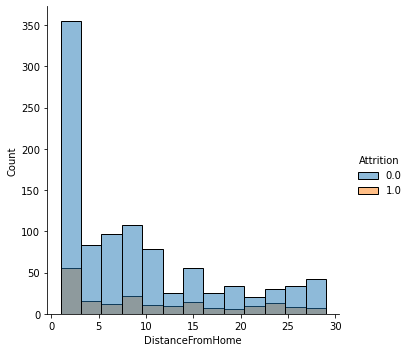

Median 'DistanceFromHome' pivot table:
Attrition         0.0  1.0
DistanceFromHome    7    9


In [77]:
sns.displot(train, x="DistanceFromHome", hue="Attrition")
plt.show()
print('Median \'DistanceFromHome\' pivot table:')
print(pd.pivot_table(train,columns='Attrition',values='DistanceFromHome',aggfunc='median'))

However, the above plot and pivot table show us that the overwhelming majority of the employees live relatively close to the workplace, despite whether attrition occurred for them. Thus, even if the median of the distance is slightly higher for the employees that left the company, we cannot conclude that 'DistanceFromHome' is very important to predict attrition (at least on its own). It might be the case that the random forest classifier ranked this variable very high because of its relatively high cardinality. 

On the contrary, 'BusinessTravel' seems to be fairly useful to predict attrition. 

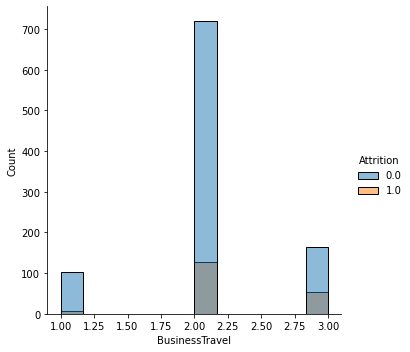

BusinessTravel    1    2    3
Attrition                    
0.0             103  720  164
1.0               8  128   53


In [78]:
sns.displot(train, x="BusinessTravel", hue="Attrition")
plt.show()
print(pd.pivot_table(train,index='Attrition',columns='BusinessTravel',values='Age',aggfunc='count'))

Thus, attrition occurred for 7.2% of the employees that don't have to travel, 15.1% of the employees that rarely have to travel, and 24.4% of the employees that frequently have to travel. This means that the employees that frequently have to travel are more likely to change job, and that it is difficult to replace them. This is certainly a variable that it would be interesting to explore more in the future.

Finally, we notice that the logistic regression classifiers that relied only on 'EnvironmentSatisfaction' and 'YearsSinceLastPromotion' did just barely better than a random guess classifier. This is quite surprising, especially considering that all classifiers considered these features to be fairly (if not very) important. We conclude that further research is needed to assess the importance of these features. 

## 5. Conclusions and Future Work

We trained several models that have an AUC greater than 0.82. After tuning, the model that performed the best is the support vector classifier (AUC = 0.840). Unfortunately, this model is not interpretable. Thus, we identified the most important features using the random forest classifier (AUC = 0.826) and some logistic regression classifiers (Ridge logistic regression classifier AUC = 0.831). Since our dataset has an unresolved multicollinearity issue, and since the random forest classifier incorrectly considers lower cardinality variables to be less important, we individually retested each feature. We did this by using each feature individually to train a logistic regression classifier. The resulting AUC's indicate that 'MonthlyIncome' and 'TotalWorkingYears' are the most important variables to predict attrition. However, the high correlation between these features (0.76) prevents us from concluding that both variables are important. Further research is needed to better assess the relationship between these features and attrition. Additionally, we found that both 'OverTime' and 'BusinessTravel' are indeed important features to predict attrition. Thus, attrition is more likely to occur for employees that don't have much work experience and have a lower income, and for employees that work overtime. Also, attrition seems to be mostly due to less experienced employees leaving the company rather than to more experienced employees retiring. Specifically, the company seems to be able to replace senior-level employees very well but it struggles to be attractive for entry-level employees. Additionally, employees that have to travel frequently are more likely to leave the company and they are difficult to replace. Surprisingly, 'YearsSinceLastPromotion' and 'EnvironmentSatisfaction' seemed to be unimportant (at least on their own), even though all classifiers ranked them as either fairly important or very important. 

Other than polishing the code, further exploring the data, and experimenting to improve the AUC of our models, we have two main goals for the future. First, we need to deal with the multicollinearity problem that is present in our data. Specifically, there are several variables that have a correlation between roughly 0.5 and 0.75. This obviously has a negative impact on our ability to make predictions and estimate what variables are most important. To address this problem, we could try keeping only a subset of variables, or we could create new variables by combining the ones we have into new variables. Additionally, we could perform a PCA and train the models using a specific number of principal components.

Second, we need to investigate how 'MonthlyIncome', 'TotalWorkingYears', and 'Attrition' are related to each other. This is very important in the case that the company is trying to reduce attrition among less experienced employees. In fact, the company could be tempted to increase the salaries but this would be a waste of money if 'MonthlyIncome' income turned out not to be a cause of attrition. 

